In [ ]:
import pandas as pd

# read dataframe without index
df = pd.read_csv('../results/afib_results.csv', index_col=0)
df.head()

In [ ]:
resnet_families = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']
mobile_net_families = ['mobilenet_v2', 'timm-mobilenetv3_large_075', 'timm-mobilenetv3_large_100',
                       'timm-mobilenetv3_large_minimal_100', 'timm-mobilenetv3_small_075',
                       'timm-mobilenetv3_small_100', 'timm-mobilenetv3_small_minimal_100']
efficient_net_families = ['efficientnet-b0', 'efficientnet-b1', 'efficientnet-b2', 'efficientnet-b3', 'efficientnet-b4',
                          'efficientnet-b5', 'efficientnet-b6', 'efficientnet-b7']

model_families_dict = {'efficientnet': efficient_net_families}

In [ ]:
model_loss_mse = {}

epochs = 60

for model_family, model_families in model_families_dict.items():
    for model_name in model_families:
        model_loss_mse[model_name] = {"overall_quality_train_loss": df[f'{model_name}_train_loss'][:epochs].values.tolist(), 
                                    "train_sharpness_attribute_mse": df[f'{model_name}_train_sharpness_attribute_mse'][:epochs].values.tolist(),
                                    "train_myocardium_nulling_attribute_mse": df[f'{model_name}_train_myocardium_nulling_attribute_mse'][:epochs].values.tolist(),
                                    "train_fibrosis_tissue_enhancement_attribute_mse": df[f'{model_name}_train_fibrosis_tissue_enhancement_attribute_mse'][:epochs].values.tolist(),
                                    "train_overall_mse": df[f'{model_name}_train_overall_mse'][:epochs].values.tolist(),
                                    
                                    "overall_quality_val_loss": df[f'{model_name}_val_loss'][:epochs].values.tolist(), 
                                    "val_sharpness_attribute_mse": df[f'{model_name}_val_sharpness_attribute_mse'][:epochs].values.tolist(),
                                    "val_myocardium_nulling_attribute_mse": df[f'{model_name}_val_myocardium_nulling_attribute_mse'][:epochs].values.tolist(),
                                    "val_fibrosis_tissue_enhancement_attribute_mse": df[f'{model_name}_val_fibrosis_tissue_enhancement_attribute_mse'][:epochs].values.tolist(),
                                    "val_overall_mse": df[f'{model_name}_val_overall_mse'][:epochs].values.tolist()}

In [ ]:
import matplotlib.pyplot as plt
# plot loss and mse for each model of each family in a single plot

FIG_SIZE = 12

# make plot bigger
plt.rcParams["figure.figsize"] = (FIG_SIZE,FIG_SIZE)

In [ ]:
# plot loss and mse
# model_loss_mse[model_name] = {"overall_quality_train_loss": df[f'{model_name}_train_loss'][:epochs].values.tolist(), 
#                                     "train_sharpness_attribute_mse": df[f'{model_name}_train_sharpness_attribute_mse'][:epochs].values.tolist(),
#                                     "train_myocardium_nulling_attribute_mse": df[f'{model_name}_train_myocardium_nulling_attribute_mse'][:epochs].values.tolist(),
#                                     "train_fibrosis_tissue_enhancement_attribute_mse": df[f'{model_name}_train_fibrosis_tissue_enhancement_attribute_mse'][:epochs].values.tolist(),
#                                     "train_overall_mse": df[f'{model_name}_train_overall_mse'][:epochs].values.tolist(),
                                    
#                                     "overall_quality_val_loss": df[f'{model_name}_val_loss'][:epochs].values.tolist(), 
#                                     "val_sharpness_attribute_mse": df[f'{model_name}_val_sharpness_attribute_mse'][:epochs].values.tolist(),
#                                     "val_myocardium_nulling_attribute_mse": df[f'{model_name}_val_myocardium_nulling_attribute_mse'][:epochs].values.tolist(),
#                                     "val_fibrosis_tissue_enhancement_attribute_mse": df[f'{model_name}_val_fibrosis_tissue_enhancement_attribute_mse'][:epochs].values.tolist(),
#                                     "val_overall_mse": df[f'{model_name}_val_overall_mse'][:epochs].values.tolist()}
for model_name, loss_mse in model_loss_mse.items():
    plt.plot(loss_mse['overall_quality_train_loss'], label=f'{model_name}_overall_quality_train_loss')

# make plot pretty
plt.title('Training Loss of Overall Quality')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.savefig('../results/overall_quality_train_loss.png')
plt.show()

# plot val loss
for model_name, loss_mse in model_loss_mse.items():
    plt.plot(loss_mse['overall_quality_val_loss'], label=f'{model_name}_overall_quality_val_loss')

# make plot pretty
plt.title('Validation Loss of Overall Quality')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.rcParams["figure.figsize"] = (FIG_SIZE,FIG_SIZE)

plt.legend()

plt.savefig('../results/overall_quality_val_loss.png')
plt.show()

# plot train_sharpness_attribute_mse, train_myocardium_nulling_attribute_mse, train_fibrosis_tissue_enhancement_attribute_mse and train_overall_mse in subfigures
for model_name, loss_mse in model_loss_mse.items():
    plt.plot(loss_mse['train_sharpness_attribute_mse'], label=f'{model_name}_train_sharpness_attribute_mse')
    plt.plot(loss_mse['train_myocardium_nulling_attribute_mse'], label=f'{model_name}_train_myocardium_nulling_attribute_mse')
    plt.plot(loss_mse['train_fibrosis_tissue_enhancement_attribute_mse'], label=f'{model_name}_train_fibrosis_tissue_enhancement_attribute_mse')
    plt.plot(loss_mse['train_overall_mse'], label=f'{model_name}_train_overall_mse')

    # make plot pretty
    plt.title('Training MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')

    plt.rcParams["figure.figsize"] = (FIG_SIZE,FIG_SIZE)

    plt.legend()

    plt.savefig(f'../results/{model_name}_train_mse.png')
    plt.show()

# plot val_sharpness_attribute_mse, val_myocardium_nulling_attribute_mse, val_fibrosis_tissue_enhancement_attribute_mse and val_overall_mse in subfigures
for model_name, loss_mse in model_loss_mse.items():
    plt.plot(loss_mse['val_sharpness_attribute_mse'], label=f'{model_name}_val_sharpness_attribute_mse')
    plt.plot(loss_mse['val_myocardium_nulling_attribute_mse'], label=f'{model_name}_val_myocardium_nulling_attribute_mse')
    plt.plot(loss_mse['val_fibrosis_tissue_enhancement_attribute_mse'], label=f'{model_name}_val_fibrosis_tissue_enhancement_attribute_mse')
    plt.plot(loss_mse['val_overall_mse'], label=f'{model_name}_val_overall_mse')

    # make plot pretty
    plt.title('Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')

    plt.rcParams["figure.figsize"] = (FIG_SIZE,FIG_SIZE)

    plt.legend()

    plt.savefig(f'../results/{model_name}_val_mse.png')
    plt.show()


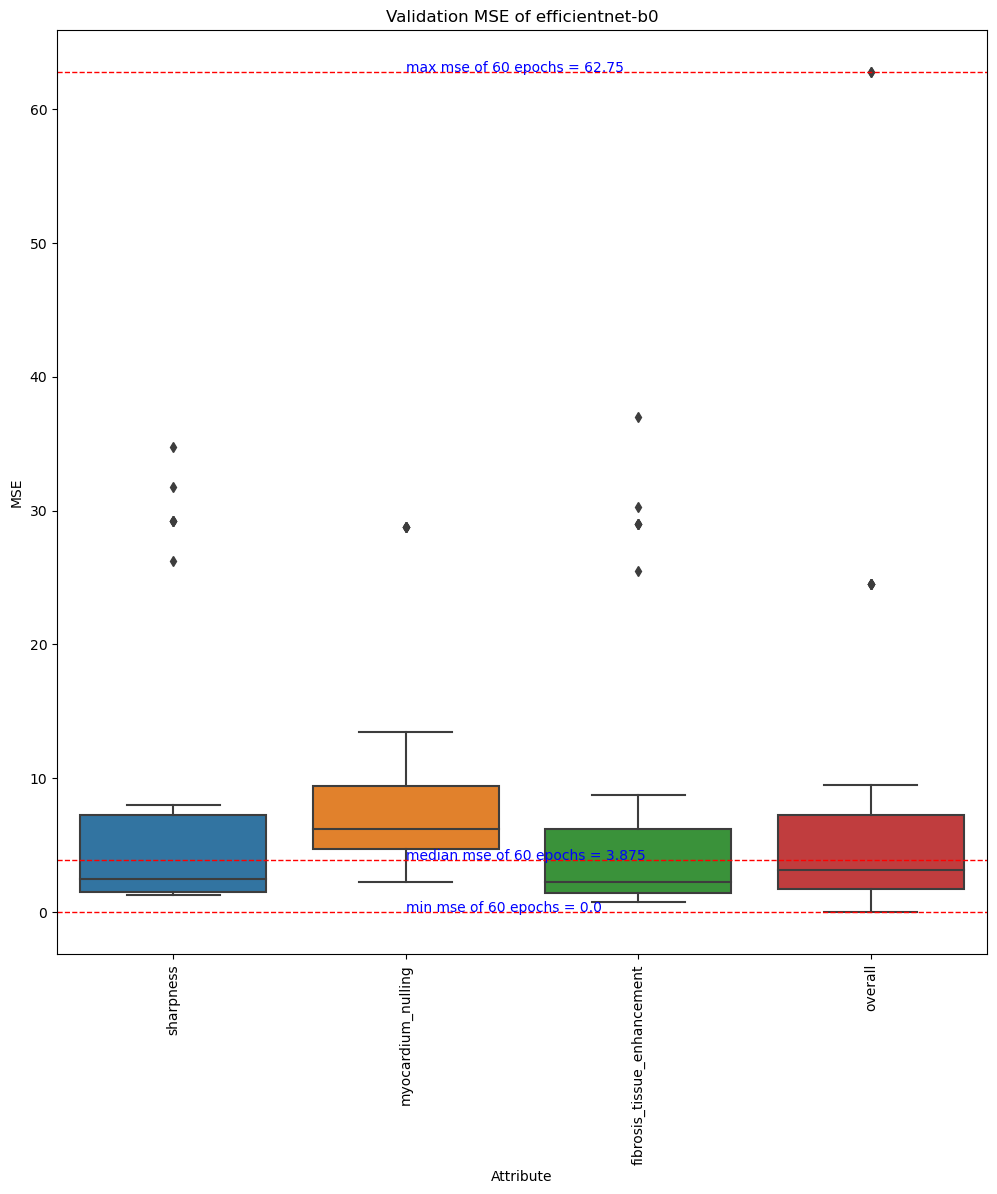

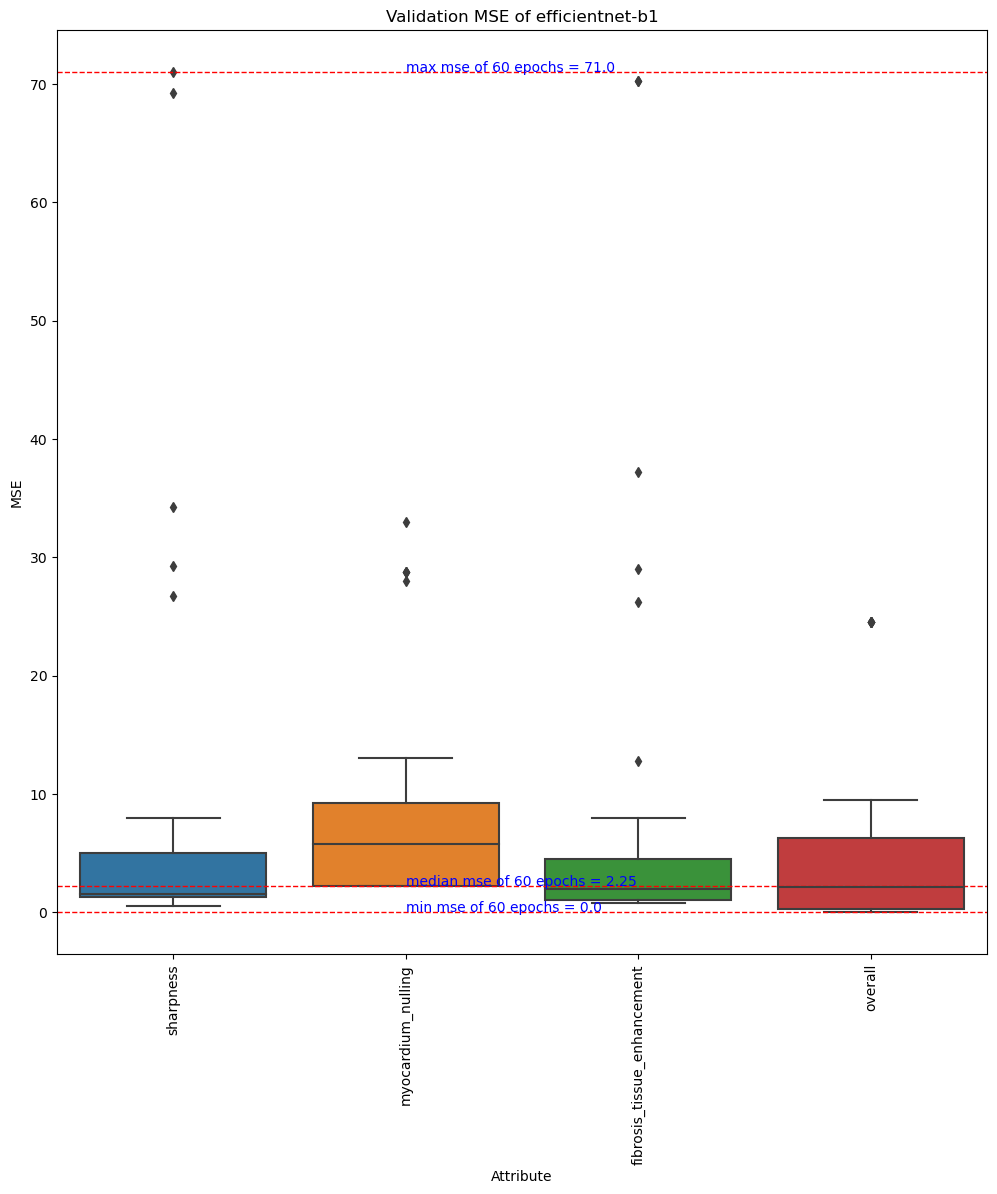

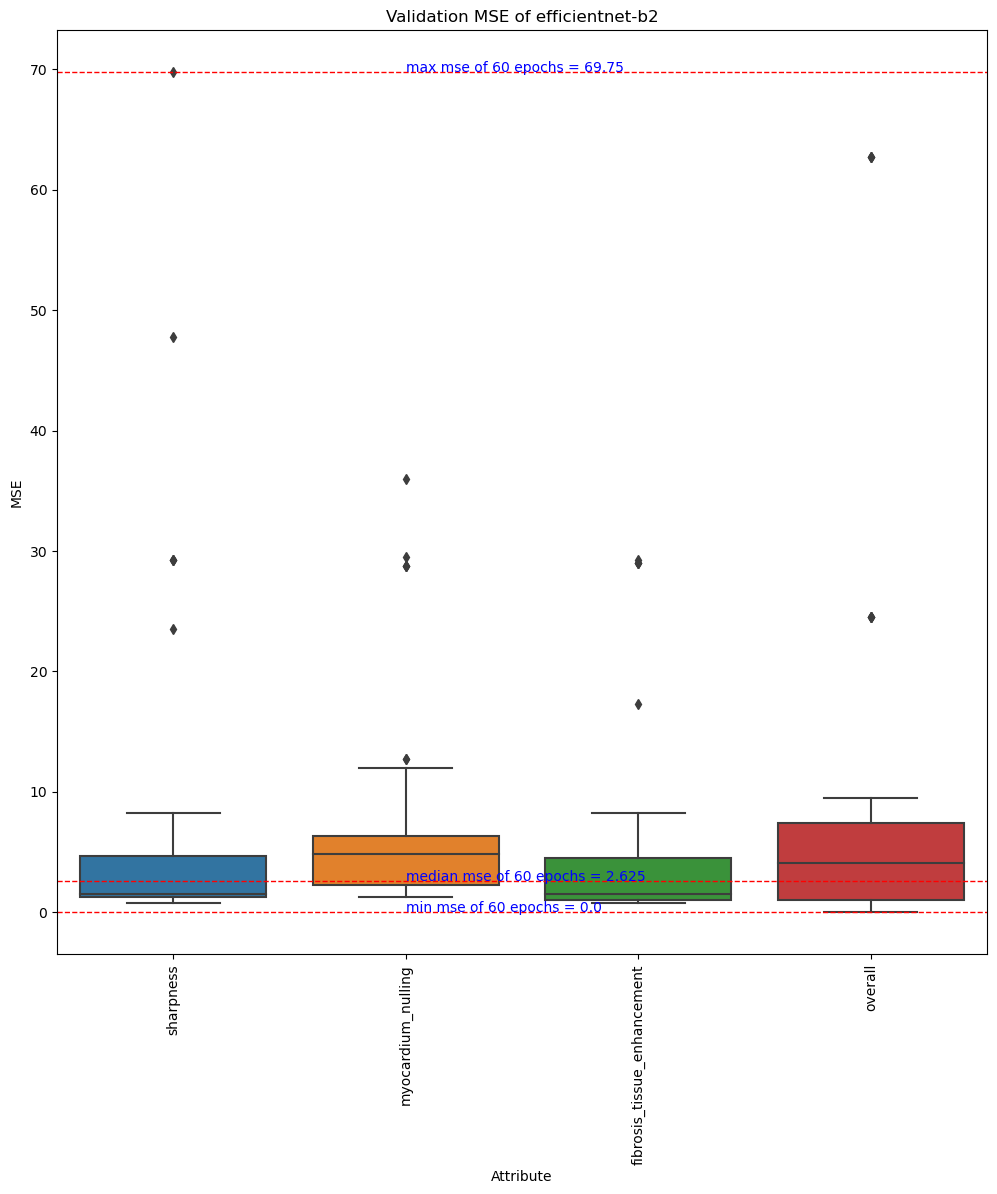

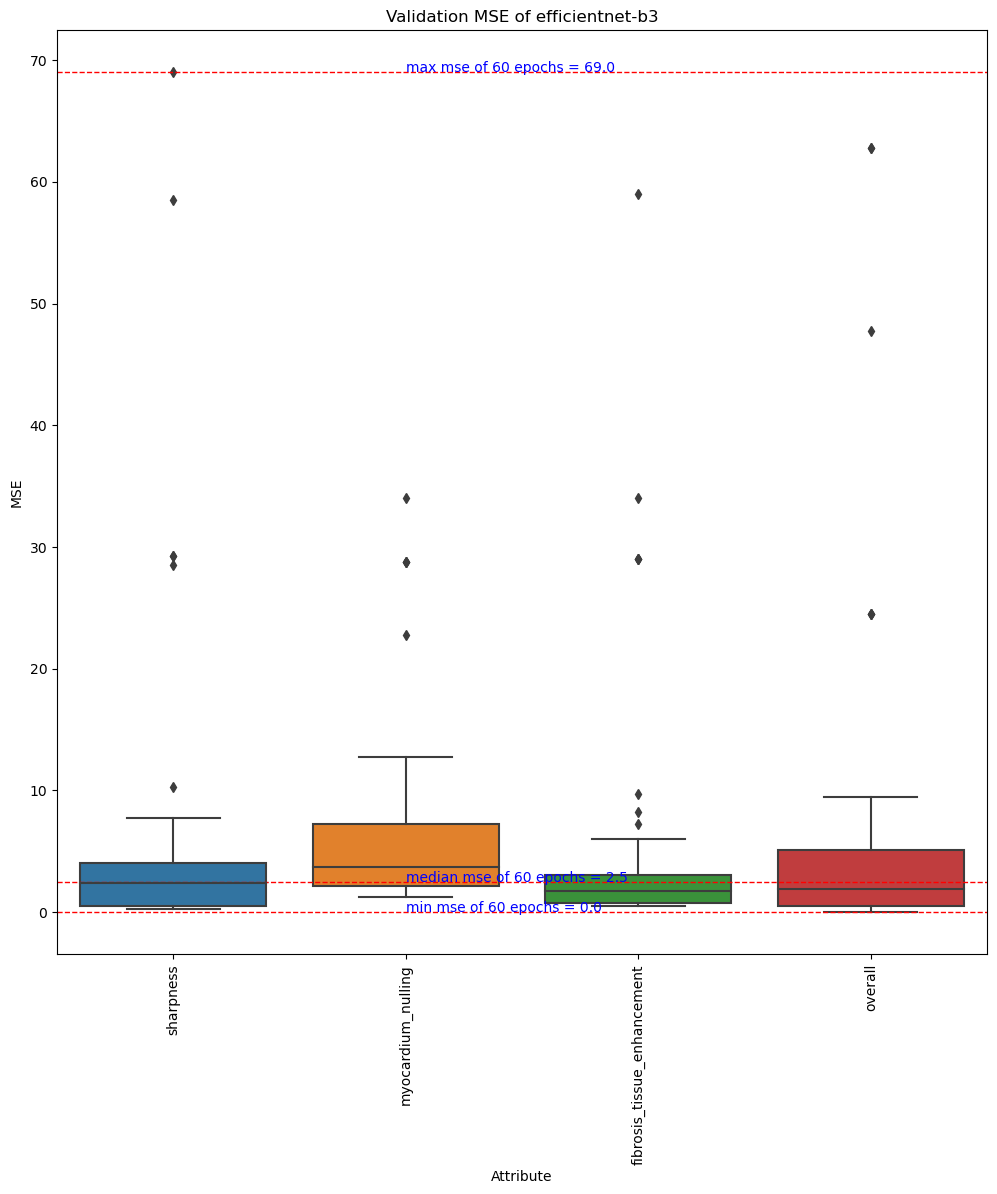

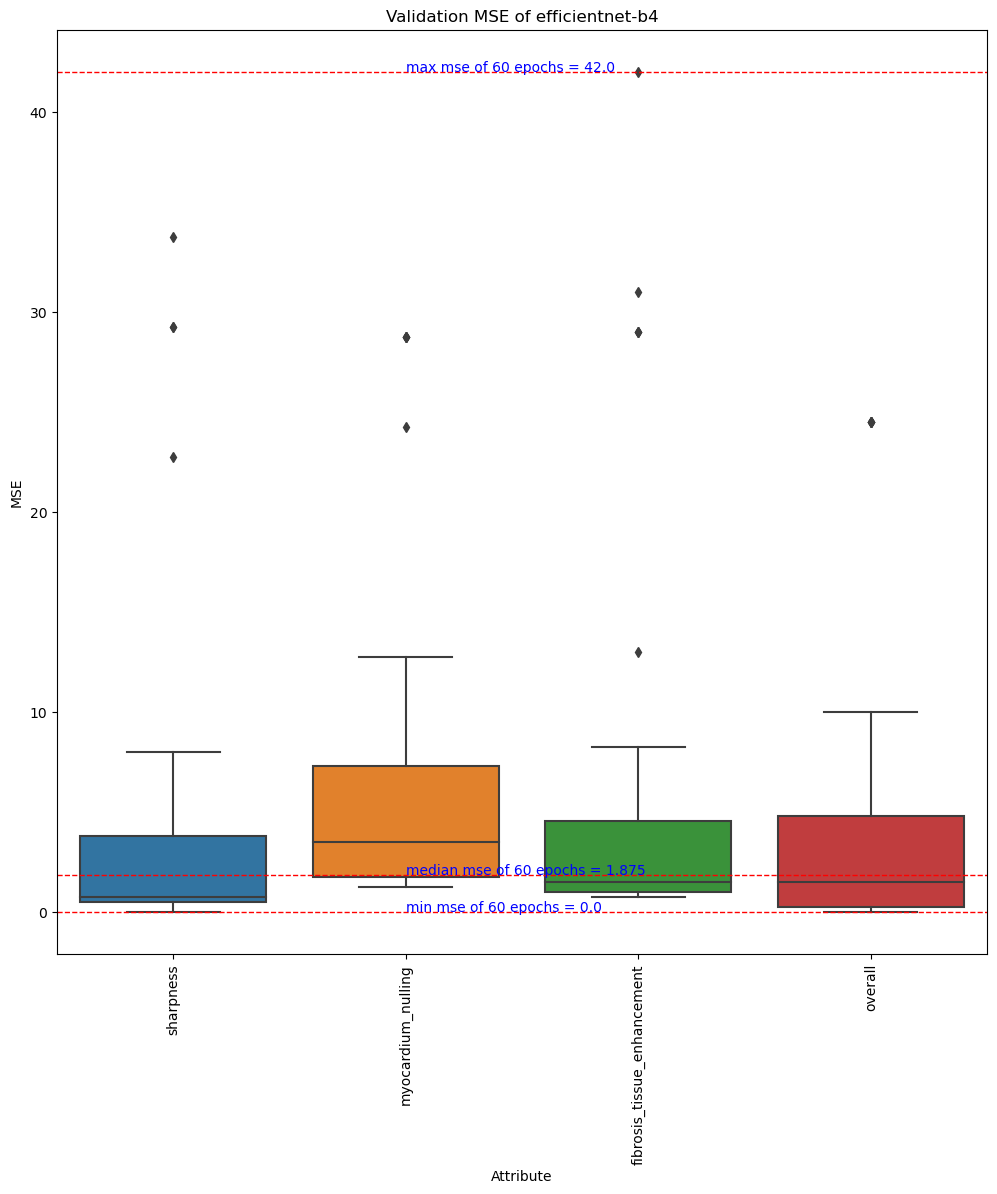

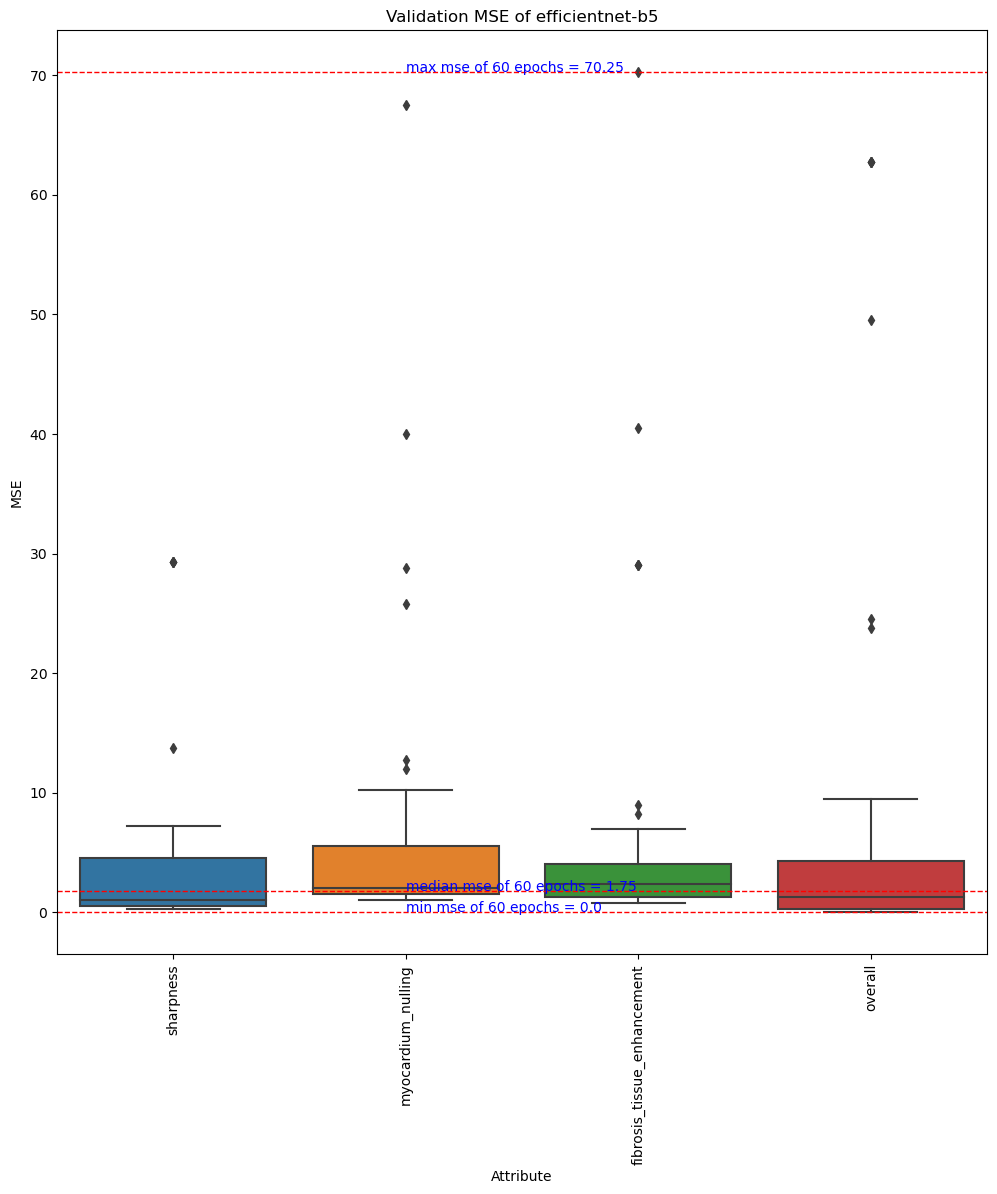

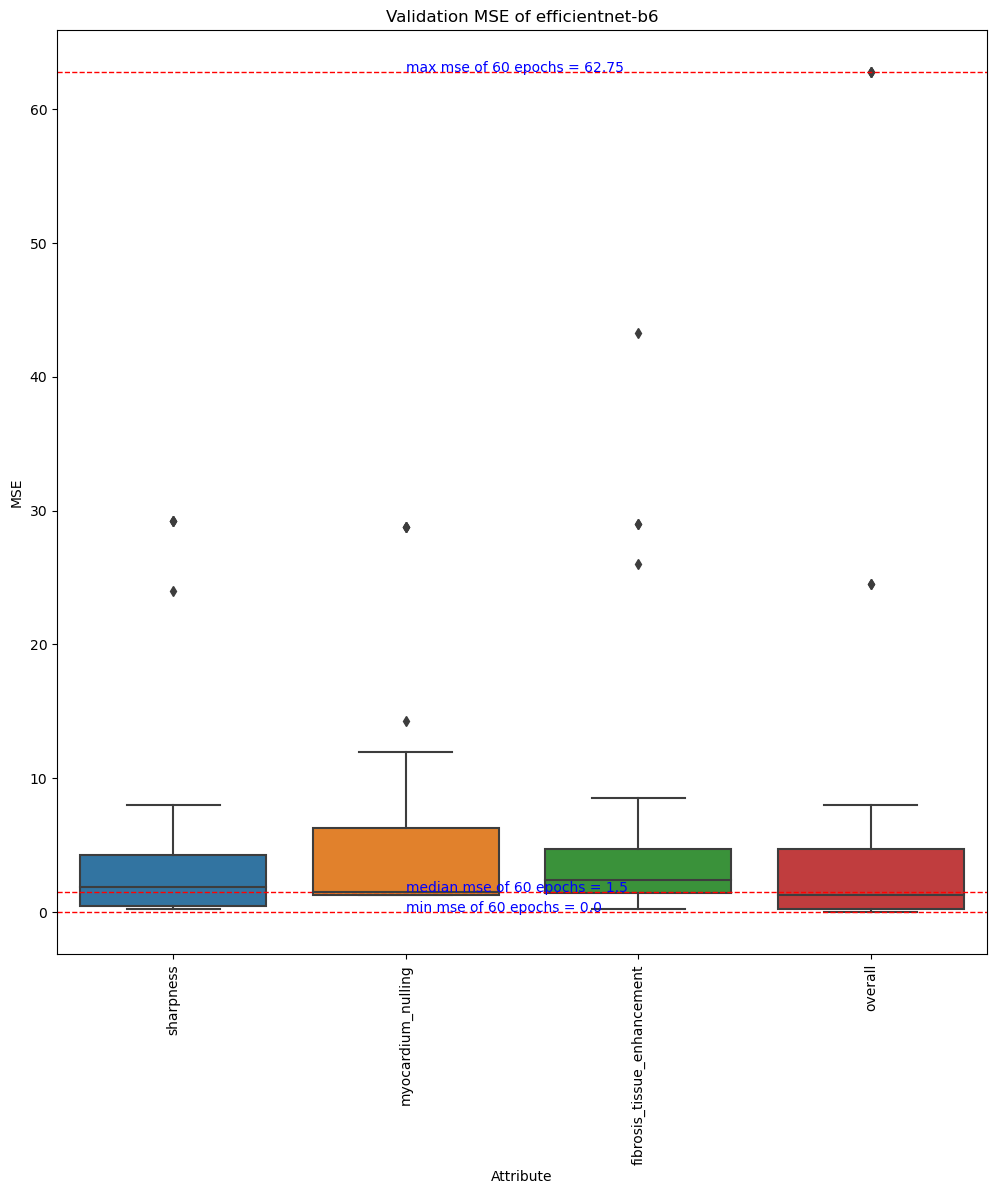

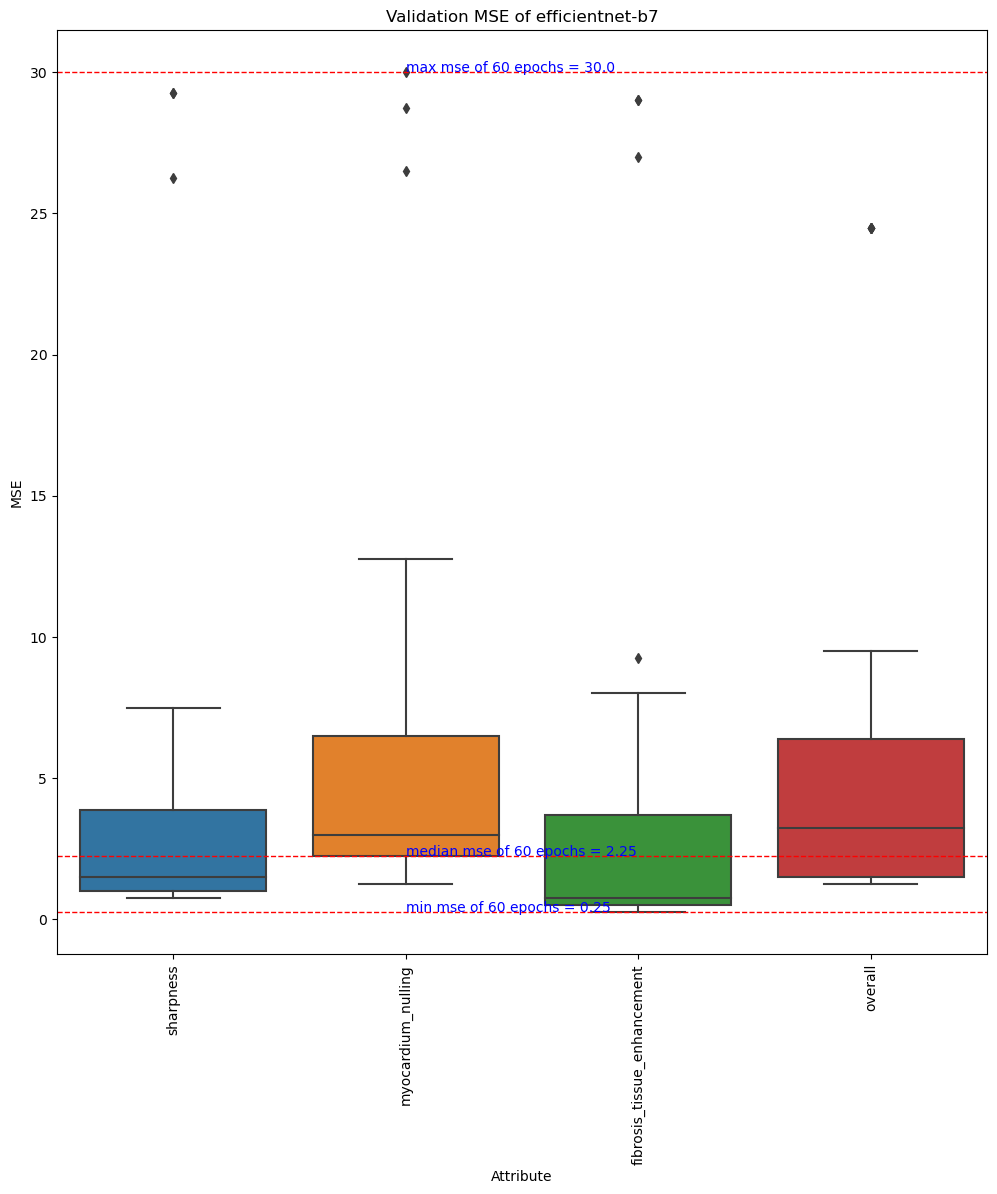

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn

# data = [loss_mse['val_mse'] for _, loss_mse in model_loss_mse.items()]

# make box plot of val_sharpness_attribute_mse, val_myocardium_nulling_attribute_mse, val_fibrosis_tissue_enhancement_attribute_mse and val_overall_mse of all models
for model_name, loss_mse in model_loss_mse.items():
    data = [loss_mse['val_sharpness_attribute_mse'], loss_mse['val_myocardium_nulling_attribute_mse'], 
            loss_mse['val_fibrosis_tissue_enhancement_attribute_mse'], loss_mse['val_overall_mse']]
    # make box plot using seaborn
    seaborn.boxplot(data=data)
    plt.title(f'Validation MSE of {model_name}')
    plt.xlabel('Attribute')
    plt.ylabel('MSE')
    plt.xticks(np.arange(0, len(data)), ['sharpness', 'myocardium_nulling', 'fibrosis_tissue_enhancement', 'overall'], rotation=90)
    # show median
    plt.axhline(np.median(data), color='r', linestyle='dashed', linewidth=1)
    # show min and max
    plt.axhline(np.min(data), color='r', linestyle='dashed', linewidth=1)
    plt.axhline(np.max(data), color='r', linestyle='dashed', linewidth=1)
    # show the number of min
    plt.text(1, np.min(data), f'min mse of {epochs} epochs = {np.min(data)}', color='blue', fontsize=10)
    # show the number of max
    plt.text(1, np.max(data), f'max mse of {epochs} epochs = {np.max(data)}', color='blue', fontsize=10)
    # show the number of median
    plt.text(1, np.median(data), f'median mse of {epochs} epochs = {np.median(data)}', color='blue', fontsize=10)

    plt.savefig(f'../results/{model_name}_val_mse.png')
    plt.show()

# make box plot using seaborn
# seaborn.boxplot(data=data)
# plt.title('Validation MSE')
# plt.xlabel('Model')
# plt.ylabel('MSE')
# plt.xticks(np.arange(0, len(model_loss_mse.keys())), list(model_loss_mse.keys()), rotation=90)
# # show median
# plt.axhline(np.median(data), color='r', linestyle='dashed', linewidth=1)
# # show min and max
# plt.axhline(np.min(data), color='r', linestyle='dashed', linewidth=1)
# plt.axhline(np.max(data), color='r', linestyle='dashed', linewidth=1)
# # show the number of min
# plt.text(1, np.min(data), f'min mse = {np.min(data)}', color='blue', fontsize=10)

# plt.savefig('../results/val_mse_boxplot.png')
# plt.show()

In [ ]:
# get intra class correlation coefficient for each model of each family
model_intra_class_correlation_coefficient = {}

for model_family, model_families in model_families_dict.items():
    for model_name in model_families:
        model_intra_class_correlation_coefficient[model_name] = df[f'{model_name}_intra_class_correlation coefficient'][:25].values.tolist()

import matplotlib.pyplot as plt
import numpy as np
import seaborn

data = [intra_class_correlation_coefficient for _, intra_class_correlation_coefficient in model_intra_class_correlation_coefficient.items()]

# make box plot using seaborn
seaborn.boxplot(data=data)
plt.title('Intra Class Correlation Coefficient')


In [ ]:
from pathlib import Path
import torch

from tqdm import tqdm
from util.utils import get_test_dataloader, get_true_vs_predicted_values, plot_confusion_matrix

from model.QCModel import QCModel
from data.afib_dataset import AfibDataset
import segmentation_models_pytorch as smp

root_dir = Path('dataset/afib_data')

test_loader = get_test_dataloader(root_dir, AfibDataset)

device = "cpu"

for model_family, model_families in tqdm(model_families_dict.items()):
        for model_name in tqdm(model_families):
            print("Testing model: ", model_name)
            model = smp.Unet(
                    encoder_name=model_name,  # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
                    encoder_weights="imagenet",  # use `imagenet` pre-trained weights for encoder initialization
                    in_channels=1,  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
                    classes=3,  # model output channels (number of classes in your dataset)
                )
                # model
            qc_model = QCModel(model.encoder, model_family, 5).to(device)
            qc_model.load_state_dict(torch.load(f'model/saved_models/{model_name}_best.pth'))
            qc_model.eval()
                
            test_true_labels, test_pred_labels = get_true_vs_predicted_values(test_loader, model)

            # get intra class correlation coefficient
            intra_class_correlation = []
            intra_class_correlation += [np.corrcoef(test_true_labels, test_pred_labels)[0, 1]]

            df[f'{model_name}_intra_class_correlation coefficient'] = intra_class_correlation
